In [ ]:
# Importing necessary libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Assessment/Inequality in Education.csv")

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
  ISO3               Country Human Development Groups UNDP Developing Regions  \
0  AFG           Afghanistan                      Low                      SA   
1  AGO                Angola                   Medium                     SSA   
2  ALB               Albania                     High                     ECA   
3  AND               Andorra                Very High                     NaN   
4  ARE  United Arab Emirates                Very High                      AS   

   HDI Rank (2021)  Inequality in Education (2010)  \
0            180.0                       42.809000   
1            148.0                             NaN   
2             67.0                       11.900000   
3             40.0                       15.160302   
4             26.0                             NaN   

   Inequality in Education (2011)  Inequality in Education (2012)  \
0                       44.823380                       44.823380   
1                             NaN

In [ ]:
import numpy as np
import pandas as pd

# Check for missing values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Fill missing numerical values with mean
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Fill missing categorical values with mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check for missing values after handling
print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values Before Handling:
ISO3                               0
Country                            0
Human Development Groups           4
UNDP Developing Regions           44
HDI Rank (2021)                    4
Inequality in Education (2010)    58
Inequality in Education (2011)    45
Inequality in Education (2012)    38
Inequality in Education (2013)    30
Inequality in Education (2014)    27
Inequality in Education (2015)    27
Inequality in Education (2016)    27
Inequality in Education (2017)    27
Inequality in Education (2018)    23
Inequality in Education (2019)    21
Inequality in Education (2020)    19
Inequality in Education (2021)    19
dtype: int64

Missing Values After Handling:
ISO3                              0
Country                           0
Human Development Groups          0
UNDP Developing Regions           0
HDI Rank (2021)                   0
Inequality in Education (2010)    0
Inequality in Education (2011)    0
Inequality in Education (2012)    0
Inequ

In [ ]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(data.head())


Data after basic cleaning:
  iso3               country human_development_groups undp_developing_regions  \
0  AFG           Afghanistan                      Low                      SA   
1  AGO                Angola                   Medium                     SSA   
2  ALB               Albania                     High                     ECA   
3  AND               Andorra                Very High                     SSA   
4  ARE  United Arab Emirates                Very High                      AS   

   hdi_rank_(2021)  inequality_in_education_(2010)  \
0            180.0                       42.809000   
1            148.0                       20.654419   
2             67.0                       11.900000   
3             40.0                       15.160302   
4             26.0                       20.654419   

   inequality_in_education_(2011)  inequality_in_education_(2012)  \
0                       44.823380                       44.823380   
1                     

In [ ]:
data.columns

Index(['iso3', 'country', 'human_development_groups',
       'undp_developing_regions', 'hdi_rank_(2021)',
       'inequality_in_education_(2010)', 'inequality_in_education_(2011)',
       'inequality_in_education_(2012)', 'inequality_in_education_(2013)',
       'inequality_in_education_(2014)', 'inequality_in_education_(2015)',
       'inequality_in_education_(2016)', 'inequality_in_education_(2017)',
       'inequality_in_education_(2018)', 'inequality_in_education_(2019)',
       'inequality_in_education_(2020)', 'inequality_in_education_(2021)'],
      dtype='object')

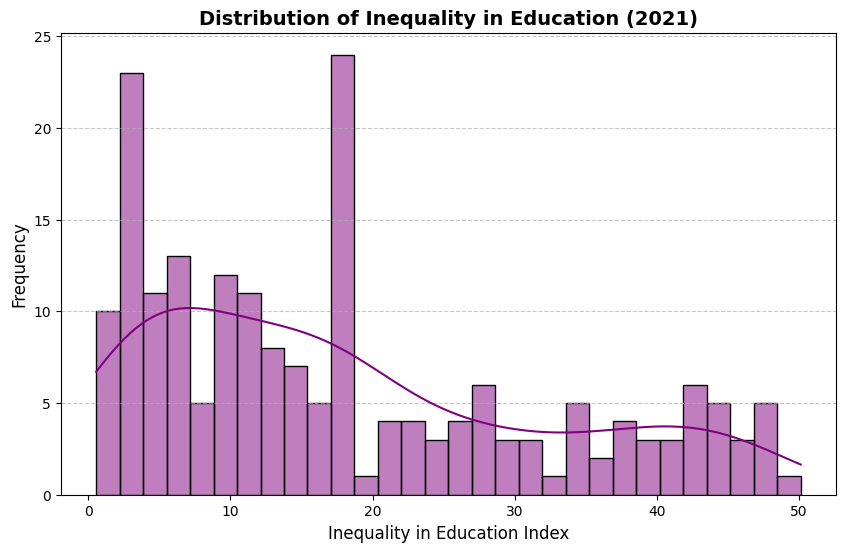

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for 2021 data
data_2021 = data['inequality_in_education_(2021)'].dropna()

# Plot Distribution of Inequality in Education (2021)
plt.figure(figsize=(10, 6))
sns.histplot(data_2021, kde=True, bins=30, color='purple')

# Formatting
plt.title('Distribution of Inequality in Education (2021)', fontsize=14, fontweight='bold')
plt.xlabel('Inequality in Education Index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<ipython-input-14-7721f531f17f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='human_development_groups', y='inequality_in_education_(2021)', data=data_filtered, palette='Set2')


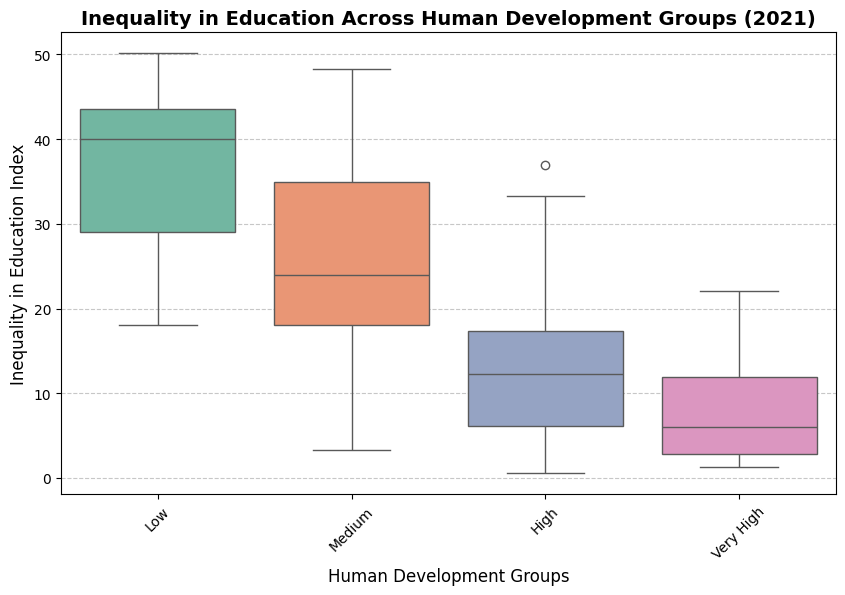

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for relevant columns
data_filtered = data[['human_development_groups', 'inequality_in_education_(2021)']].dropna()

# Plot Boxplot for Inequality in Education by Human Development Groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='human_development_groups', y='inequality_in_education_(2021)', data=data_filtered, palette='Set2')

# Formatting
plt.title('Inequality in Education Across Human Development Groups (2021)', fontsize=14, fontweight='bold')
plt.xlabel('Human Development Groups', fontsize=12)
plt.ylabel('Inequality in Education Index', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
print(data.columns)


Index(['iso3', 'country', 'human_development_groups',
       'undp_developing_regions', 'hdi_rank_(2021)',
       'inequality_in_education_(2010)', 'inequality_in_education_(2011)',
       'inequality_in_education_(2012)', 'inequality_in_education_(2013)',
       'inequality_in_education_(2014)', 'inequality_in_education_(2015)',
       'inequality_in_education_(2016)', 'inequality_in_education_(2017)',
       'inequality_in_education_(2018)', 'inequality_in_education_(2019)',
       'inequality_in_education_(2020)', 'inequality_in_education_(2021)'],
      dtype='object')


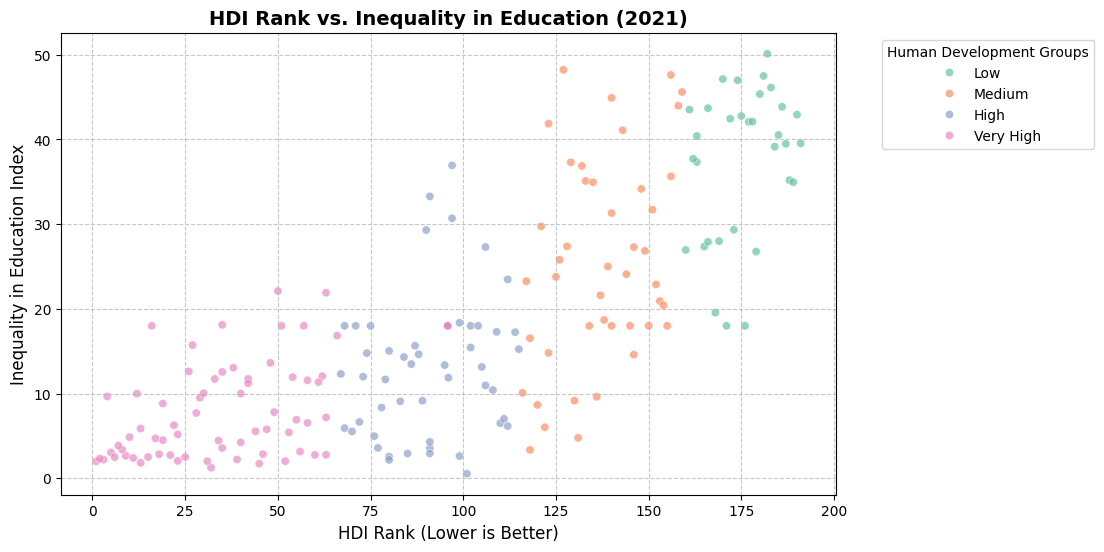

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use correct column names
data_filtered = data[['hdi_rank_(2021)', 'inequality_in_education_(2021)', 'human_development_groups']].dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='hdi_rank_(2021)',
    y='inequality_in_education_(2021)',
    hue='human_development_groups',
    data=data_filtered,
    alpha=0.7,
    palette='Set2'
)

# Formatting
plt.title('HDI Rank vs. Inequality in Education (2021)', fontsize=14, fontweight='bold')
plt.xlabel('HDI Rank (Lower is Better)', fontsize=12)
plt.ylabel('Inequality in Education Index', fontsize=12)
plt.legend(title='Human Development Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.show()

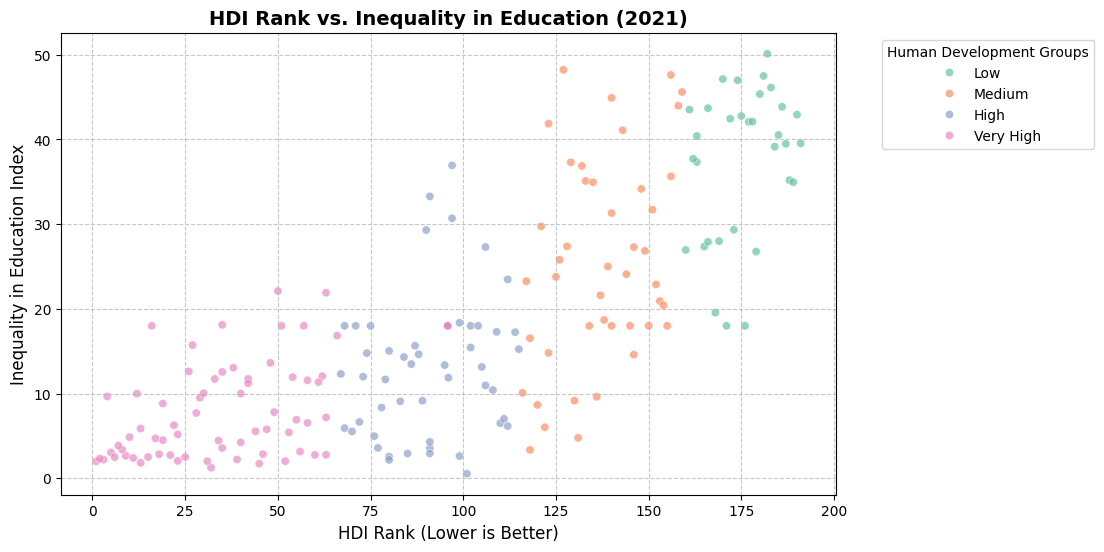

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for relevant columns
data_filtered = data[['hdi_rank_(2021)', 'inequality_in_education_(2021)', 'human_development_groups']].dropna()

# Scatter plot of HDI Rank vs. Inequality in Education
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='hdi_rank_(2021)',
    y='inequality_in_education_(2021)',
    hue='human_development_groups',
    data=data_filtered,
    alpha=0.7,
    palette='Set2'
)

# Formatting
plt.title('HDI Rank vs. Inequality in Education (2021)', fontsize=14, fontweight='bold')
plt.xlabel('HDI Rank (Lower is Better)', fontsize=12)
plt.ylabel('Inequality in Education Index', fontsize=12)
plt.legend(title='Human Development Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.show()


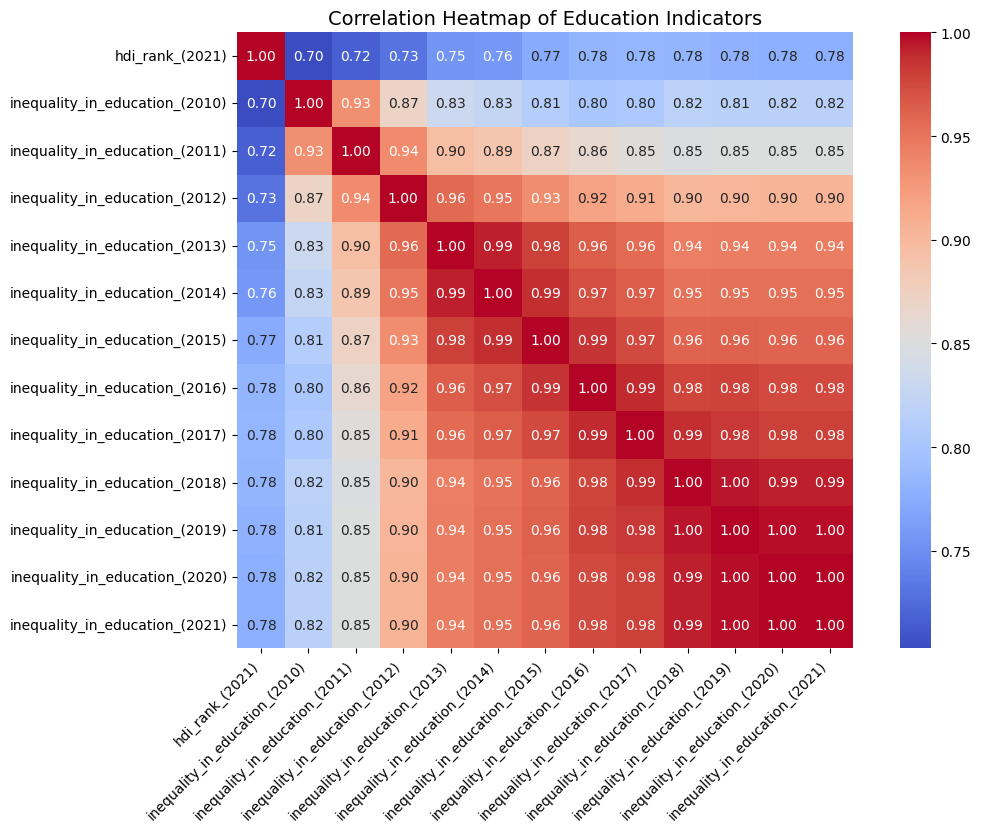

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical columns for correlation
numerical_columns = ['hdi_rank_(2021)'] + [col for col in data.columns if 'inequality_in_education' in col]
correlation_matrix = data[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Formatting
plt.title('Correlation Heatmap of Education Indicators', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Print column names to confirm correct formatting
print("Available columns:", data.columns.tolist())

# Define the correct column names
correct_col_name = 'Inequality in Education (2021)'
hdi_rank_col = 'HDI Rank (2021)'

# Define bins and labels for Inequality in Education
bins = [0, 0.1, 0.2, np.inf]  # Adjust based on data distribution
labels = [0, 1, 2]  # 0: Low, 1: Medium, 2: High Inequality

# Creating a categorical column based on inequality levels
data['education_inequality_level'] = pd.cut(data[correct_col_name], bins=bins, labels=labels)

# Drop rows with NaN in 'education_inequality_level' (if any)
data = data.dropna(subset=['education_inequality_level'])

# Selecting features and target
X = data[[hdi_rank_col]].values  # Features
y = data['education_inequality_level'].astype(int).values  # Target as integers

# Normalizing the features for better performance
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Filtering for binary classification (low vs medium for simplicity)
binary_filter = (y == 0) | (y == 1)
X = X[binary_filter]
y = y[binary_filter]

# Check dataset size
print(f"Filtered dataset size: X={X.shape}, y={y.shape}")

Available columns: ['ISO3', 'Country', 'Human Development Groups', 'UNDP Developing Regions', 'HDI Rank (2021)', 'Inequality in Education (2010)', 'Inequality in Education (2011)', 'Inequality in Education (2012)', 'Inequality in Education (2013)', 'Inequality in Education (2014)', 'Inequality in Education (2015)', 'Inequality in Education (2016)', 'Inequality in Education (2017)', 'Inequality in Education (2018)', 'Inequality in Education (2019)', 'Inequality in Education (2020)', 'Inequality in Education (2021)', 'education_inequality_level']
Filtered dataset size: X=(0, 1), y=(0,)


In [ ]:
# Building Logistic Regression from scratch using Sigmoid function and evaluating its performance.

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function and gradient computation
def compute_cost_and_gradient(X, y, weights, bias):
    m = X.shape[0]
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    # Cost: Binary cross-entropy
    cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Gradients
    dw = np.dot(X.T, (predictions - y)) / m
    db = np.mean(predictions - y)

    return cost, dw, db

# Gradient descent optimization
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    for i in range(num_iterations):
        cost, dw, db = compute_cost_and_gradient(X, y, weights, bias)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print cost every 100 iterations for debugging
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias

# Predict labels using the trained model
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= 0.5).astype(int)

In [ ]:
# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
# Training the logistic regression model from scratch
learning_rate = 0.01
num_iterations = 1000
weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)

# Predict on training and test sets
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Evaluate logistic regression from scratch
print("Logistic Regression from Scratch:")
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Iteration 0: Cost 0.6931471805599454
Iteration 100: Cost 0.5982143170189823
Iteration 200: Cost 0.5381957395347899
Iteration 300: Cost 0.49880595441698816
Iteration 400: Cost 0.4718787414579362
Iteration 500: Cost 0.4527761739424562
Iteration 600: Cost 0.43878894472795704
Iteration 700: Cost 0.4282724724558819
Iteration 800: Cost 0.42018890505682344
Iteration 900: Cost 0.41385931156214945
Logistic Regression from Scratch:

Train Set Evaluation:
Accuracy: 0.8214
Precision: 0.8209
Recall: 0.8088
F1 Score: 0.8148


Test Set Evaluation:
Accuracy: 0.8333
Precision: 0.8500
Recall: 0.8500
F1 Score: 0.8500



In [ ]:
# Model no. 1 - Logistic Regression using Scikit-Learn

from sklearn.metrics import classification_report

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print(classification_report(y_test, y_pred_sklearn))


Scikit-Learn Logistic Regression Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.85      0.85      0.85        20

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



In [ ]:
# Model no. 2 - Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.82      0.90      0.86        20

    accuracy                           0.83        36
   macro avg       0.84      0.82      0.83        36
weighted avg       0.84      0.83      0.83        36



In [ ]:
# Model Comparison Output

# Model no. 1 - Logistic Regression

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_sklearn))

# Model no. 2 - Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Model Comparison Output
if accuracy_sklearn > accuracy_rf:
    print("Logistic Regression performed better based on accuracy.")
else:
    print("Random Forest performed better based on accuracy.")


Logistic Regression Accuracy: 0.8333
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.85      0.85      0.85        20

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36

Random Forest Classifier Accuracy: 0.8333
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.82      0.90      0.86        20

    accuracy                           0.83        36
   macro avg       0.84      0.82      0.83        36
weighted avg       0.84      0.83      0.83        36

Random Forest performed better based on accuracy.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Model 1 - Logistic Regression Hyperparameter Tuning
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithms
}

grid_search_log_reg = GridSearchCV(log_reg_sklearn, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

print("Best Hyperparameters for Logistic Regression:", grid_search_log_reg.best_params_)

log_reg_cv_score = cross_val_score(grid_search_log_reg.best_estimator_, X_train, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv_score.mean():.4f}")

Best Hyperparameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression Cross-Validation Accuracy: 0.8286


In [ ]:
# Model 2 - Random Forest Hyperparameter Tuning

# Define the hyperparameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [10],  # Number of trees
    'max_depth': [10],  # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt'],  # Number of features to consider for each split
    'bootstrap': [True]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Cross-validation score for Random Forest with best parameters
rf_cv_score = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_score.mean():.4f}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest Cross-Validation Accuracy: 0.7643


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection for Logistic Regression
# Select the best features based on the f_classif scoring function

k_best = 1  # Adjust based on dataset characteristics
select_k_best_log_reg = SelectKBest(f_classif, k=k_best)  # Select top features
X_train_selected_log_reg = select_k_best_log_reg.fit_transform(X_train, y_train)
X_test_selected_log_reg = select_k_best_log_reg.transform(X_test)

# Print the selected features' indices and the feature scores
print("Selected Features for Logistic Regression:")
selected_features_log_reg = select_k_best_log_reg.get_support(indices=True)
print("Feature indices:", selected_features_log_reg)
print("Feature scores:", select_k_best_log_reg.scores_)

# Train a Logistic Regression model on the selected features
log_reg_selected = LogisticRegression()
log_reg_selected.fit(X_train_selected_log_reg, y_train)

# Evaluate the model
y_pred_log_reg_selected = log_reg_selected.predict(X_test_selected_log_reg)
accuracy_log_reg_selected = accuracy_score(y_test, y_pred_log_reg_selected)
print(f"Logistic Regression with selected features Accuracy: {accuracy_log_reg_selected:.4f}")


Selected Features for Logistic Regression:
Feature indices: [0]
Feature scores: [137.47046581]
Logistic Regression with selected features Accuracy: 0.8333


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Feature Selection for Random Forest

# Fit a Random Forest model to evaluate feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Select features based on importance scores (median threshold)
select_from_rf = SelectFromModel(rf_model, threshold="median", prefit=True)
X_train_selected_rf = select_from_rf.transform(X_train)
X_test_selected_rf = select_from_rf.transform(X_test)

# Print the selected features' indices
print("Selected Features for Random Forest:")
selected_features_rf = select_from_rf.get_support(indices=True)
print("Feature indices:", selected_features_rf)

# Train a Random Forest model on the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected_rf, y_train)

# Evaluate the model
y_pred_rf_selected = rf_selected.predict(X_test_selected_rf)
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
print(f"Random Forest with selected features Accuracy: {accuracy_rf_selected:.4f}")

Selected Features for Random Forest:
Feature indices: [0]
Random Forest with selected features Accuracy: 0.7778


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Use the best hyperparameters from GridSearchCV
best_params = {'C': 0.001, 'solver': 'liblinear'}

# Step 2: Train Logistic Regression with the best hyperparameters
log_reg_final = LogisticRegression(C=best_params['C'], solver=best_params['solver'])

# Step 3: Train the Logistic Regression model on the selected features
log_reg_final.fit(X_train_selected_log_reg, y_train)

# Step 4: Evaluate the model
y_pred_log_reg_final = log_reg_final.predict(X_test_selected_log_reg)
accuracy_log_reg_final = accuracy_score(y_test, y_pred_log_reg_final)

# Step 6: Compare with previous performance.
print(f"Final Logistic Regression Accuracy: {accuracy_log_reg_final:.4f}")
print(f"Logistic Regression with selected features Accuracy: {accuracy_log_reg_selected:.4f}")

# Step 7: Did the performance improve?
if accuracy_log_reg_final > accuracy_log_reg_selected:
    print("Model performance improved after using the best hyperparameters and selected features.")
else:
    print("Model performance did not improve after using the best hyperparameters and selected features.")

Final Logistic Regression Accuracy: 0.8333
Logistic Regression with selected features Accuracy: 0.8333
Model performance did not improve after using the best hyperparameters and selected features.
